# Importing Libraries

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings

# import module Scikit-Learn provides functions for splitting data into training and test sets
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
# Importing the dataset
dataset = pd.read_csv('student_data.csv')

In [3]:
# Loking at the dataset
dataset.head(100)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171.0,1,1,122.0,1,19,12.0,...,0,0.0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254.0,1,1,160.0,1,1,3.0,...,0,6.0,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070.0,1,1,122.0,1,37,37.0,...,0,6.0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773.0,1,1,122.0,1,38,37.0,...,0,6.0,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014.0,0,1,100.0,1,37,38.0,...,0,6.0,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,15,1,9119.0,1,1,130.0,26,38,3.0,...,0,5.0,11,3,13.250000,0,13.9,-0.3,0.79,Enrolled
96,1,1,5,9773.0,1,1,135.0,1,37,1.0,...,0,6.0,6,6,13.333333,0,8.9,1.4,3.51,Graduate
97,1,1,5,9500.0,1,1,132.0,1,37,37.0,...,0,8.0,9,8,14.477778,0,12.4,0.5,1.79,Graduate
98,1,1,1,9085.0,1,1,135.0,1,1,2.0,...,0,5.0,7,5,13.800000,0,12.7,3.7,-1.70,Enrolled


 This Studie has a main subject the studant data, related to studants information. Its possible to notice few columns like marital status, attendance, mother and father qualification, previous qualification so and so, variables responsible for gave a overview and idea of understanding of the dataset and based on the context apply a proper descison based on statiscal methods to peform features selections, characterisation in general its will allow to gave important information.

Has solution of this assessment task, the use of machine learns in that study has approach and purpose required to feature extraction for training data using important features. this Studie case is considered to maintain the scope simple dividing in cells all the process with purpose of avoid complex process, easy understanding and wrong accuracy.

One of motivation of use the process aplied its discovery how technology change and meets needs to support and benefit descision makes,  its considered the process of cleaning and evaluation, EDA and provide relational justification why criatical thinking to cahnge type of data, impute some values or even if will benecessary drop some features.


In [4]:
dataset.describe(include='all') # summary overview of dataset

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424,4424.000000,4424.000000,4423.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4423.000000,...,4424.000000,4423.000000,4424.000000,4424.000000,4423.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
top,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,3918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2207
mean,NaN,18.669078,1.727848,8856.458738,0.890823,4.577758,132.613314,1.873192,19.561935,22.271987,...,0.541817,6.231743,8.063291,4.435805,10.229941,0.150316,11.566139,1.228029,0.001969,NaN
std,NaN,17.484682,1.313793,2063.763479,0.311897,10.216592,13.188332,6.914514,15.603186,15.343244,...,1.918546,2.196038,3.947951,3.014764,5.211367,0.753774,2.663850,1.382711,2.269935,NaN
min,NaN,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,NaN,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,NaN,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,NaN,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


In [5]:
print(dataset.info()) # overview of all type of columns, dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   object 
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4423 non-null   float64
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

<h3>Characterisation of the data</h3>


In [6]:
df = pd.DataFrame(dataset)# create a pd dataframe

rows = df.shape[0]  #number of rows
columns =  df.shape[1]  #number of comlumns
print("Dataset:",df.shape, "\nNumber of rows:", rows, "\nNumber of Columns:", columns)


categorical_columns=dataset.select_dtypes(include=['object']).columns #count of categorical columns
numerical_columns = dataset.select_dtypes(include=np.number).columns.tolist() #count of numerical columns
print("\n Categorical Variables:",categorical_columns, "\n Numerical Variables:", numerical_columns)


missing_values = df.isnull().values.any() #contains missing value
print("\n Contain Missing values: ?", missing_values)
print("\n Columns with missed values: \n", df.isna().any())


print("\n \n Sum of miss value:\n",df.isnull().sum())

#Observations is a simply one occurence

Dataset: (4424, 37) 
Number of rows: 4424 
Number of Columns: 37

 Categorical Variables: Index(['Marital status', 'Displaced', 'Tuition fees up to date',
       'Age at enrollment', 'Curricular units 1st sem (credited)', 'Target'],
      dtype='object') 
 Numerical Variables: ['Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Educational special needs', 'Debtor', 'Gender', 'Scholarship holder', 'International', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approve

Part of preprocessing the data was observed Columns, divided between in two classes, "Categorical", "Numerical", also checked and printed on the previous reports the number of rows, columns, identified if contain missed value and those values below to what specific colomns, also count to see how many, quantify the amount of missed value, duplicated and type identified has object NaN (Not a number)has parte of data cleaning.

Decide a best approach to drop the missed value, the amount of a total 4,424 on the orginal data, after cleanead: 4,411 an total of 13 rows dropped, based in a total of quantitie of rows ins a slyght minimal loss, also the most of relevant are numeric good for EDA visualization in this context of data crucial for the next steps.


# Data preparation

In [7]:
columns = [
    'Marital status', 'Displaced', 'Tuition fees up to date',
    'Age at enrollment', 'Curricular units 1st sem (credited)'
] # Columns identified has object type on the dataset 

for col in columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
result = df.dropna()
print("Qtd of original row count:", df.shape[0], "\nQtd of cleaned row count:", result.shape[0])

duplicated = df[df.duplicated()]
print("\n Duplicated columns:\n" ,duplicated)

Qtd of original row count: 4424 
Qtd of cleaned row count: 4411

 Duplicated columns:
 Empty DataFrame
Columns: [Marital status, Application mode, Application order, Course, Daytime/evening attendance, Previous qualification, Previous qualification (grade), Nacionality, Mother's qualification, Father's qualification, Mother's occupation, Father's occupation, Admission grade, Displaced, Educational special needs, Debtor, Tuition fees up to date, Gender, Scholarship holder, Age at enrollment, International, Curricular units 1st sem (credited), Curricular units 1st sem (enrolled), Curricular units 1st sem (evaluations), Curricular units 1st sem (approved), Curricular units 1st sem (grade), Curricular units 1st sem (without evaluations), Curricular units 2nd sem (credited), Curricular units 2nd sem (enrolled), Curricular units 2nd sem (evaluations), Curricular units 2nd sem (approved), Curricular units 2nd sem (grade), Curricular units 2nd sem (without evaluations), Unemployment rate, Infl

In [15]:
def normalize_target(target):
    target = str(target).lower()
    if 'drop' in target:
        return 'Dropout' # Consolidates 'Drop', 'dropout', 'Dropout'
    elif 'grad' in target:
        return 'Graduate' # Consolidates 'Grad', 'graduate', 'Graduate'
    elif 'enroll' in target:
        return 'Enrolled'
    return 'Unknown' 
result['Target'] = result['Target'].apply(normalize_target)

X = result.drop('Target', axis=1)  #X all columns except target
le = LabelEncoder() #enconding target 
y = le.fit_transform(result['Target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler() # standardizing the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
components = 33     #33 defined the number of features components 
pca = PCA(n_components=components) # pca to reduce dimensionality

pca = PCA(n_components=components)
X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)
print(f"Reduced Features: {X_train_reduced.shape[1]}")

Reduced Features: 33


An observation on the previous visualization using the method dataset.head() its possible infer skewness asymmetry distribution in features like "Application mode" with skewness value 17 skewed , "Previous qualification (grade)" value of 122.00 extremely skewed, and for some algorithms this could cause some problems in a poor performance, while will be necessary transform this data to reduce skewness for a PCA purpose.

In [11]:
random_f_reduced = RandomForestClassifier(random_state=42)
random_f_reduced.fit(X_train_reduced, y_train)
y_pred_reduced = random_f_reduced.predict(X_test_reduced)
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
print(f"Accuracy PCA reduced Dataset ({components} features): {accuracy_reduced:.4f}")


random_f = RandomForestClassifier(random_state=42)
random_f.fit(X_train_scaled, y_train)
y_pred_normal = random_f.predict(X_test_scaled)
accuracy_normal = accuracy_score(y_test, y_pred_normal)
print(f"Accuracy PCA Original Dataset 36 features: {accuracy_normal:.4f}")

Accuracy PCA reduced Dataset (33 features): 0.7387
Accuracy PCA Original Dataset 36 features: 0.7659


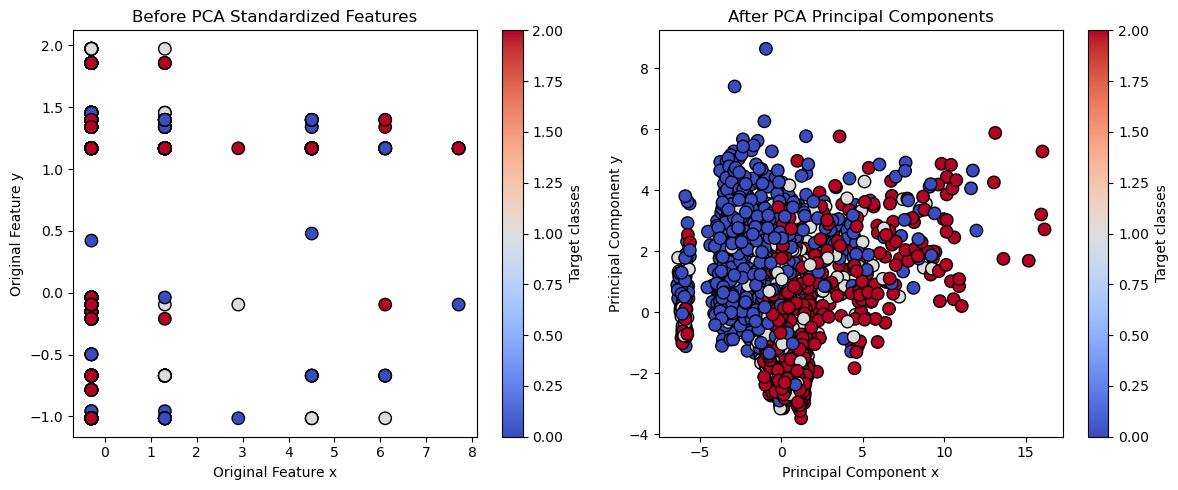

In [25]:
y_numeric =y_train
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) #
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:,1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel('Original Feature x')
plt.ylabel('Original Feature y')
plt.title('Before PCA Standardized Features')
plt.colorbar(label='Target classes')

plt.subplot(1, 2, 2)
plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel('Principal Component x')
plt.ylabel('Principal Component y')
plt.title('After PCA Principal Components')
plt.colorbar(label='Target classes')

plt.tight_layout()
plt.show()

# References

GeeksforGeeks (n.d.) Principal Component Analysis (PCA). Available at: https://www.geeksforgeeks.org/data-analysis/principal-component-analysis-pca (Accessed: 7 November 2025).

pandas development team (n.d.) pandas.DataFrame.duplicated. Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html (Accessed: 31 October 2025).

W3Schools (n.d.) Pandas Cleaning Empty Cells. Available at: https://www.w3schools.com/python/pandas/pandas_cleaning_empty_cells.asp (Accessed: 12 November 2025).
